# Natural Language Processing and Artificial Intelligence

Business Leadership in the Age of Artificial Intelligence

February 16, 2022

[Judit Ács](https://hlt.bme.hu/en/judit),
[Ádám Kovács](https://hlt.bme.hu/en/kovacsadam)


judit@sch.bme.hu

https://github.com/juditacs/corvinus_nlp_intro

## Agenda

- Overview of NLP tasks
- SpaCy NLP toolkit
- Neural networks in NLP, sequence modeling
- Pre-trained language models, BERT

## What is NLP?

Broadest definitions: any interaction between the computer and human language.

Intersection of multiple scientific fields:
- computer science
- linguistics
- artificial intelligence
- (cognitive psychology)

## Why do we need NLP?

- End goal: to make the computer 'understand' text - we are not there yet
- Current capabilities:
    - Extract useful information from it (analysis)
    - Generate text in a limited way (generation)

## NLP tasks

### End-user tasks

- Spellchecking
- Machine translation
- Chatbots

## NLP tasks & applications

- Low level NLP tasks:
    - tokenization
    - lemmatization
    - POS tagging
    - syntactic parsing
    - dependency parsing
   
- High level or downstream tasks:
    - summarization
    - question answering
    - information extraction (e.g. NER tagging)
    - relation extraction 
    - chatbots
    - machine translation

## [Spacy](https://spacy.io)

- Open-source NLP library for Python
- It features a lot of out-of-the-box models for NLP
- Hosts models for many languages

In [1]:
from IPython.display import Image
import numpy as np
import pandas as pd
import seaborn as sns
import torch
import torch.nn as nn

from transformers import pipeline
from transformers import AutoTokenizer, AutoModel

from spacy import displacy
import spacy

## Tokenization

- Splitting text into words, sentences, documents, etc..
- One of the goals of tokenizing text into words is to create a <strong>vocabulary</strong>

<p><em>Muffins cost <strong>$3.88</strong> in New York. Please buy me two as I <strong>can't</strong> go. <strong>They'll</strong> taste good. I'm going to <strong>Finland's</strong> capital to hear about <strong>state-of-the-art</strong> solutions in NLP.</em></p>

- $3.88 - split on the period?
- can't - can not?
- They'll - they will?
- Finland's - Finland?
- state-of-the-art?

In [2]:
sens = "Muffins cost $3.88 in New York. Please buy me two as I can't go." \
" They'll taste good. I'm going to Finland's capital to hear about state-of-the-art solutions in NLP."

print(sens.split())
print(len(sens.split()))

['Muffins', 'cost', '$3.88', 'in', 'New', 'York.', 'Please', 'buy', 'me', 'two', 'as', 'I', "can't", 'go.', "They'll", 'taste', 'good.', "I'm", 'going', 'to', "Finland's", 'capital', 'to', 'hear', 'about', 'state-of-the-art', 'solutions', 'in', 'NLP.']
29


In [3]:
sens = "Muffins cost $3.88 in New York. Please buy me two as I can't go." \
" They'll taste good. I'm going to Finland's capital to hear about state-of-the-art solutions in NLP."

# Load an English SpaCy model
nlp = spacy.load('en_core_web_sm')
doc = nlp(sens)

tokens = [token.text for token in doc]
print(tokens)

['Muffins', 'cost', '$', '3.88', 'in', 'New', 'York', '.', 'Please', 'buy', 'me', 'two', 'as', 'I', 'ca', "n't", 'go', '.', 'They', "'ll", 'taste', 'good', '.', 'I', "'m", 'going', 'to', 'Finland', "'s", 'capital', 'to', 'hear', 'about', 'state', '-', 'of', '-', 'the', '-', 'art', 'solutions', 'in', 'NLP', '.']


In [4]:
for sen in doc.sents:
    print(sen)

Muffins cost $3.88 in New York.
Please buy me two as I can't go.
They'll taste good.
I'm going to Finland's capital to hear about state-of-the-art solutions in NLP.


In [5]:
pd.DataFrame(
    [
        {"text": token.text, "is_alpha": token.is_alpha, "is_stop": token.is_stop}
        for token in doc
    ]
).iloc[:15]

,text,is_alpha,is_stop
0,Muffins,True,False
1,cost,True,False
2,$,False,False
3,3.88,False,False
4,in,True,True
5,New,True,False
6,York,True,False
7,.,False,False
8,Please,True,True
9,buy,True,False


### Lemmatization

- The goal of lemmatization is to find the dictionary form of the words
- Called the "lemma" of a word
- _dogs_ -> _dog_ , _went_ -> _go_
- Ambiguity plays a role: _saw_ -> _see_?
- Needs POS tag to disambiguate

In [6]:
doc = nlp("I saw two dogs yesterday.")

lemmas = [token.lemma_ for token in doc]
print(lemmas)

['I', 'see', 'two', 'dog', 'yesterday', '.']


### Stemming

- Similar to lemmatization, it tries to normalize the text
- Stems are always substrings of the word

### POS tagging

- Words can be groupped into grammatical categories called **Part of speech**
- Words belonging to the same group are often interchangable
- Ambiguity: _guard_ ?
- Similar to _szófaj_

In [7]:
doc = nlp("The white dog went to play football yesterday.")

[token.pos_ for token in doc]

['DET', 'ADJ', 'NOUN', 'VERB', 'PART', 'VERB', 'NOUN', 'NOUN', 'PUNCT']

### Morphological-analysis

- Splitting words into morphemes
- Morphemes are the smallest meaningful units in a language (part of the words)
- Ambiguity: _várnak_

friends = friend + s

waiting = wait + ing

megvárhatlak = meg + vár + hat + lak

### Named entity recognition

- Identify the present entities in the text

In [8]:
sens = "Muffins cost $3.88 in New York. Please buy me two as I can't go." \
" They'll taste good. I'm going to Finland's capital to hear about state-of-the-art solutions in NLP."

doc = nlp(sens)
for ent in doc.ents:
    print(ent)

displacy.render(doc, style='ent', jupyter=True)

3.88
New York
two
Finland
NLP


### Language modelling

- One of the most important task in NLP
- The goal is to compute the "probability" of a sentence
- Can be used in:
    - Machine Translation
    - Text generation
    - Correcting spelling
    - Word vectors?
- P(the quick brown __fox__) > P(the quick brown __stick__)

### Lexical Inference, Natural Language Inference



<div class="frame">

| **entailment**                                                |     |     |
|:--------------------------------------------------------------|:----|:----|
| A young family enjoys feeling ocean waves lap at their feet.  |     |     |
| A family is at the beach                                      |     |     |
| **contradiction**                                             |     |     |
| There is no man wearing a black helmet and pushing a bicycle  |     |     |
| One man is wearing a black helmet and pushing a bicycle       |     |     |
| **neutral**                                                   |     |     |
| An old man with a package poses in front of an advertisement. |     |     |
| A man poses in front of an ad for beer.                       |     |     |

</div>

## Generative tasks

The desired output is full text, not just labels.

It has to be grammatical, fluent and factually correct.

**This is the main challenge at the moment.**

### Summarization

Make a short summary of a long input, typically a news article (but not a book).

1. Extractive: select the most important sentences.
    - Simple sentence level classification task 
    - May not be stylistically correct since sentences are missing
    - May be redundant
2. Abstractive: generate free text that summarizes the input
    - Grammatical correctness is good esp. for English
    - Coherence may be low
    - May make up _new facts_ (hallucination)
    
Hungarian demo: https://juniper.nytud.hu/demo/bart

### Machine translation

The most successful generative task ATM.

Google Translate made a lot of progress over the years.
- Google is probably the biggest employer of top tier AI researchers

[DeepL](https://www.deepl.com/en/translator)
- Claims to be the world's most accurate translator 

# Neural networks and Deep learning
- Neural network is inspired by the information processing methods of biological nervous systems
- It is composed of neurons, each layer connected to the next
- Deep learning is a neural network consisting of multiple layers
    - the idea dates back to the 60s and there was significant research in the 90s
    - it returned because of the rise of the GPUs
    - excellent open source frameworks (Pytorch, Tensorflow)

# Neural networks for sequence modeling

We deal with sequences in NLP:
- a token is a sequence of characters/morphemes
- a sentence is a sequence of tokens
- a paragraph is a sequence of sentences
- a dialogue is a sequence of utterances
- etc.

## Recurrent neural networks

- RNNs are the basic neural networks for sequences
- It takes in a sequence of words, one at a time, and produces hidden states ($h$) after each steps. 

_(image from bentrevett)_

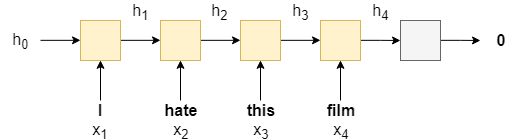

In [9]:
Image("https://github.com/bentrevett/pytorch-sentiment-analysis/raw/79bb86abc9e89951a5f8c4a25ca5de6a491a4f5d/assets/sentiment1.png", embed=True)

# Transformers

Introduced in [Attention Is All You Need](https://papers.nips.cc/paper/2017/file/3f5ee243547dee91fbd053c1c4a845aa-Paper.pdf) by Vaswani et al., 2017 (30000 citations)

Recurrence (vertical arrows) is replaced by **self attention**.

The encoder 'looks' at all the other symbols in the input sequence

## Attention

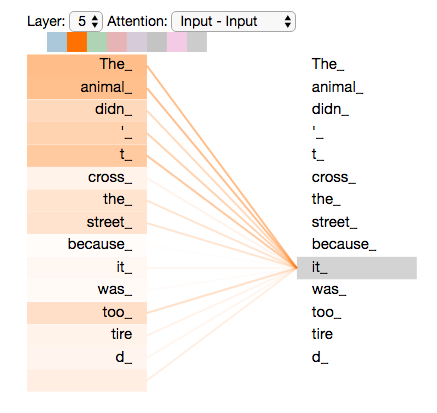

In [10]:
Image("http://jalammar.github.io/images/t/transformer_self-attention_visualization.png", embed=True)  # from Illustrated Transformers

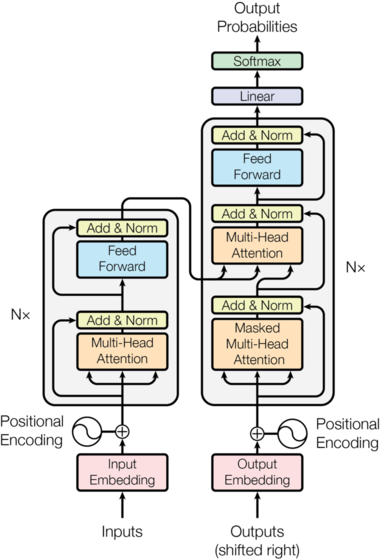

In [11]:
Image("img/transformer.png")  # from Vaswani et al. 2018

## Sequence elements

### Words

Pros:

- More or less well-defined in most languages
- Relatively short sequences (a sentence is rarely longer than 30 tokens)

Cons:
- Difficult tokenization in some languages
- Large vocabulary (100,000+ easily)
- Out-of-vocabulary words are always there regardless of the size of the vocabulary
- Many rare words
    - Hapax: a word that only appears once in the dataset.

### Characters

Pros:
- Smaller vocabulary although logographic writing systems (Chinese and Japanese) have thousands of characters
- Easy tokenization
- Well defined: Unicode symbols

Cons:
- Long sequences
- Too fine-grained, token level information is lost

### Subwords

- Multiple characters but smaller than words
- Modern language models use subword vocabularies
- (Optional) Subword tokenization demo at the end of the lecture

# Embeddings

## Word embeddings

- map each word to a small dimensional (around 100-300) continuous vector
- similar words should have similar vectors
    - Cosine similarity

## Creating word embeddings

Word embeddings are learned with neural networks. The target can be:

- predict the word given the context - The Continous Bag Of Words model (CBOW)
- predict the context given a words - The SkipGram model

The training examples are generated from big text corpora.
- no need for expensive manual annotation
- only limited by the availability of textual data - plentiful in most languages

For example from the sentence “The quick brown fox jumps over the lazy dog.” we can generate the following inputs:

![training examples](http://mccormickml.com/assets/word2vec/training_data.png)

### Famous static word embeddings for English

- [Word2vec](https://arxiv.org/pdf/1301.3781.pdf)
- [GLOVE](https://nlp.stanford.edu/projects/glove/)

# Contextualized embeddings

- static representations (GloVe, Word2vec)
    - the same vector is assigned to each occurrence of a word
    
But words can have different meaning in different contexts, e.g. the word 'stick':

1. Find some dry **sticks** and we'll make a campfire.
2. Let's **stick** with glove embeddings.

Contextualized embeddings take the full sentence as their input.
    

![elmo](http://jalammar.github.io/images/elmo-embedding-robin-williams.png)

_(Peters et. al., 2018 in the ELMo paper)_

## ELMo

**E**mbeddings from **L**anguage **Mo**dels

Word representations are functions of the full sentences instead of the word alone.

Two bidirectional LSTM layers are linearly combined.

[Deep contextualized word representations](https://arxiv.org/abs/1802.05365) by Peters et al., 2018, 8400 citations

# BERT

[BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding](https://www.aclweb.org/anthology/N19-1423/)
by Devlin et al. 2018, 29600 citations

[BERTology](https://huggingface.co/transformers/bertology.html) is the nickname for the growing amount of BERT-related research.

Masked language modeling objective:

    1. 15% of the <s>tokens</s>wordpieces are selected at the beginning.
    2. 80% of those are replaced with `[MASK]`,
    3. 10% are replaced with a random token,
    4. 10% are kept intact.

## Pre-training + Fine-tuning

1. Take a pre-trained BERT model AND a small task-specific annotated dataset
2. Add a small adaptation layer
3. Train the language model and the adaptation layer (**fine-tuning**)
    - much shorter training time than the pre-training
    - much smaller dataset than the data BERT was trained on

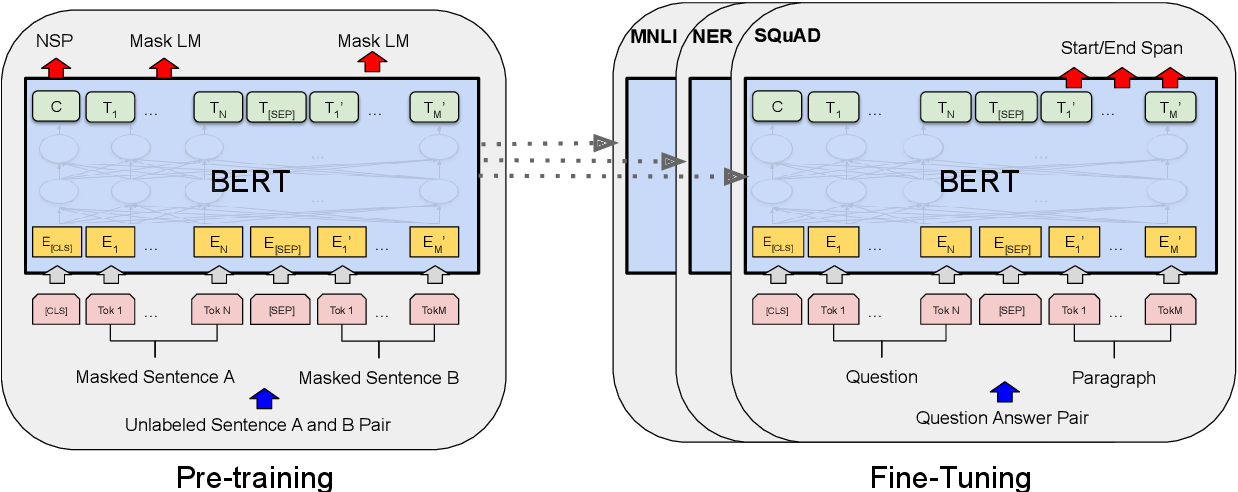

In [12]:
Image("img/bert_pretraining_finetuning.png")

## BERT versions

### BERT-Base

- 12 layers
- 110M parameters
    - _a linear regression model has $n+1$ parameters, where $n$ is the number of predictors or features_

### BERT-Large

- 24 layers
- 340M parameters

## Pre-trained checkpoints

- 4 original English models trained on Wikipedia
- 2 multilingual models for 100 languages

## BERTology

- Spawned dozens of similar models
    - Different architecture
    - Different training objective
    - Different training data or language(s) 

## Huggingface repository

Large collection of community models:
- hundreds of languages
- many domain-specific models
- multilingual models
- all freely available and usable with a few lines of Python code

https://huggingface.co/models

# Evaluation and benchmarks

- Annotated data is expensive
- Fortunately there are many freely available datasets (not just for NLP)
    - Benchmarks with standard train-test splits
        - The [GLUE benchmark](https://gluebenchmark.com/) is the most famous
    - Leaderboards
        - The best systems are almost all BERT-based now
- English is vastly overrepresented in these tasks
- HuLU Hungarian benchmark released last month: https://hulu.nlp.nytud.hu/
    - mostly a translation of GLUE

Long list of other datasets and benchmarks:
https://paperswithcode.com/area/natural-language-processing

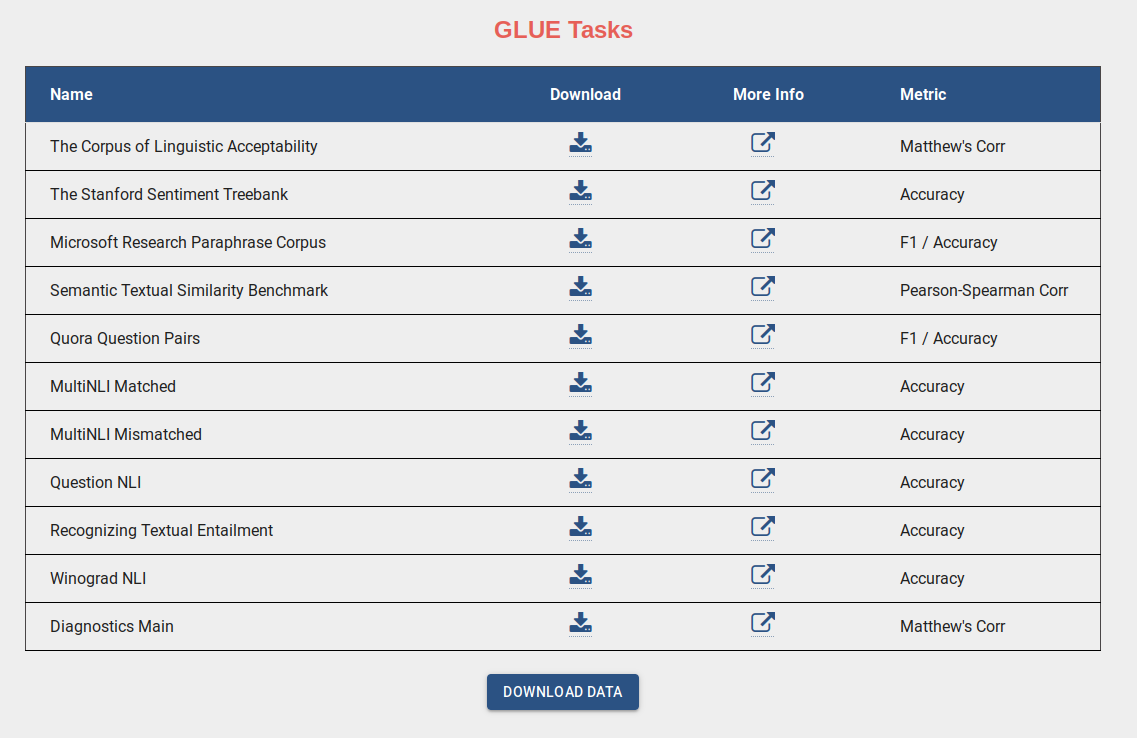

In [13]:
Image("img/glue_tasks.png", embed=True)

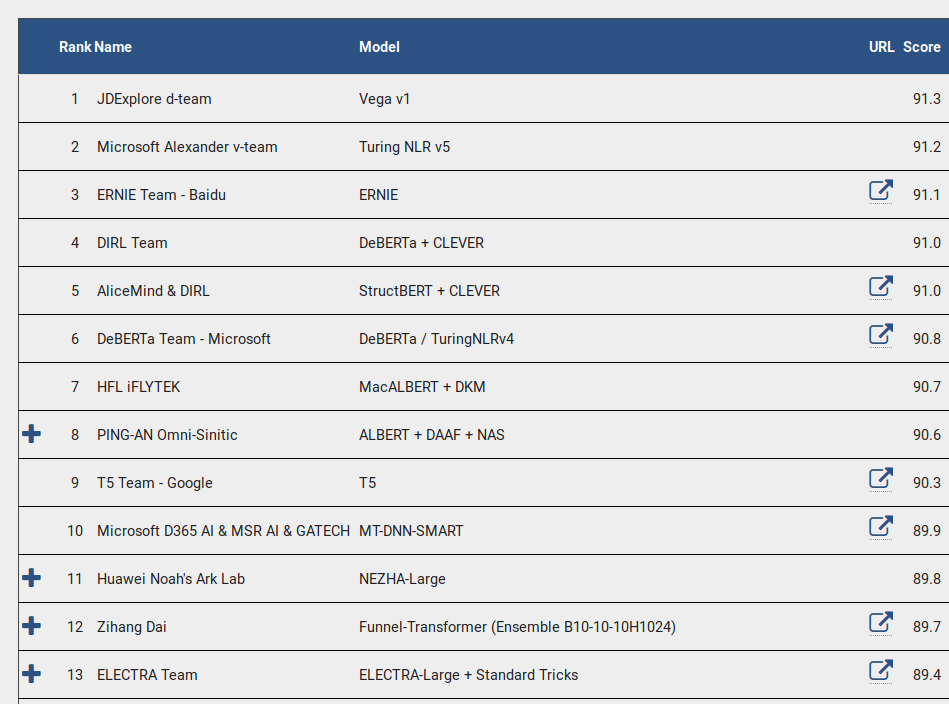

In [14]:
Image("img/glue_leaderboard.png", embed=True)

The problems with these is that the systems overfit on them and don't generalize well.

You often need to build your own dataset for special tasks.

# Interpretability

- Large pre-trained models are often called **blackbox models**
    - Complex non-linear mapping from text to high dimensional matrices
- We don't know why the model makes certain predictions
- We have limited ways of influencing them
- We can't guarantee their performance
    - A model that achieves 95% on a benchmark will make a lot more mistakes than 1 in 20 on real data
    - We don't know how well they will perform without training and testing them
        - Training can be very expensive

# What are they good for then?

- Question answering
- Machine translation
- Predictive input
- Similar document retrieval
- Sentiment analysis and topic classification

# Using BERT

## Using `BertModel` directly

`AutoModel`
- each pretrained checkpoint has a string id. `from_pretrained` instantiates the corresponding class and loads the weights:

In [15]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')
model = AutoModel.from_pretrained('bert-base-cased')
type(model), type(tokenizer)

(transformers.models.bert.modeling_bert.BertModel,
 transformers.models.bert.tokenization_bert_fast.BertTokenizerFast)

In [16]:
sentence = "There are black cats and black dogs."

output = model(**tokenizer(sentence, return_tensors='pt'), return_dict=True)

for k, v in output.items():
    print(f"{k}: {v.size()}")

last_hidden_state: torch.Size([1, 10, 768])
pooler_output: torch.Size([1, 768])


In [17]:
import gc

del model
gc.collect()

362

## BERT applications

### Sequence classification

Pretrained model for sentiment analysis.

Base model: `distilbert-base-uncased`

Finetuned on the [Stanford Sentiment Treebank](https://nlp.stanford.edu/sentiment/index.html) or SST-2, a popular sentiment analysis dataset.

Model id: `distilbert-base-uncased-finetuned-sst-2-english`

In [18]:
nlp = pipeline("sentiment-analysis")
nlp("This is an amazing class.")

[{'label': 'POSITIVE', 'score': 0.9998814463615417}]

In [19]:
nlp("This is not a good class but it's not too bad either.")

[{'label': 'POSITIVE', 'score': 0.9302217960357666}]

In [20]:
nlp("This is not a class.")

[{'label': 'NEGATIVE', 'score': 0.9993655681610107}]

In [21]:
del nlp
gc.collect()

6641

### Sequence tagging/labeling: Named entity recognition

Base model: `bert-large-cased`

Finetuned on [CoNLL-2003 NER](https://www.clips.uantwerpen.be/conll2003/ner/).

In [22]:
nlp = pipeline("ner")

In [23]:
result = nlp("Jupiter is a planet that orbits around James the center of the Universe")
result

[{'word': 'Jupiter',
  'score': 0.9177303910255432,
  'entity': 'I-LOC',
  'index': 1,
  'start': 0,
  'end': 7},
 {'word': 'James',
  'score': 0.5041971206665039,
  'entity': 'I-LOC',
  'index': 8,
  'start': 39,
  'end': 44},
 {'word': 'Universe',
  'score': 0.5249307155609131,
  'entity': 'I-LOC',
  'index': 13,
  'start': 63,
  'end': 71}]

In [24]:
result = nlp("George Clooney has a pet pig named Estella.")
result

[{'word': 'George',
  'score': 0.9989229440689087,
  'entity': 'I-PER',
  'index': 1,
  'start': 0,
  'end': 6},
 {'word': 'C',
  'score': 0.9973233938217163,
  'entity': 'I-PER',
  'index': 2,
  'start': 7,
  'end': 8},
 {'word': '##lo',
  'score': 0.9540073871612549,
  'entity': 'I-PER',
  'index': 3,
  'start': 8,
  'end': 10},
 {'word': '##oney',
  'score': 0.9897922873497009,
  'entity': 'I-PER',
  'index': 4,
  'start': 10,
  'end': 14},
 {'word': 'E',
  'score': 0.9577357172966003,
  'entity': 'I-PER',
  'index': 10,
  'start': 35,
  'end': 36},
 {'word': '##ste',
  'score': 0.9451479911804199,
  'entity': 'I-PER',
  'index': 11,
  'start': 36,
  'end': 39},
 {'word': '##lla',
  'score': 0.8656348586082458,
  'entity': 'I-PER',
  'index': 12,
  'start': 39,
  'end': 42}]

In [25]:
del nlp
gc.collect()

1673

### Machine translation

In [26]:
nlp = pipeline("translation_en_to_fr")
print(nlp("Hugging Face is a technology company based in New York and Paris", max_length=40))

Some weights of the model checkpoint at t5-base were not used when initializing T5Model: ['decoder.block.0.layer.1.EncDecAttention.relative_attention_bias.weight']
- This IS expected if you are initializing T5Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing T5Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at t5-base were not used when initializing T5ForConditionalGeneration: ['decoder.block.0.layer.1.EncDecAttention.relative_attention_bias.weight']
- This IS expected if you are initializing T5ForConditionalGeneration from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification

[{'translation_text': 'Hugging Face est une entreprise technologique basée à New York et à Paris.'}]


Even the [blessé - blessed false cognate](https://frenchtogether.com/french-english-false-friends/) is handled correctly:

In [27]:
nlp("I was blessed by God after I injured my head.", max_length=40)

[{'translation_text': "J'ai été béni par Dieu après avoir blessé ma tête."}]

In [28]:
gc.collect()

1083

In [29]:
del nlp
gc.collect()

21

### Summarization

In [30]:
summarizer = pipeline("summarization")
summarizer("Deep learning is used almost exclusively in a Linux environment.\
You need to be comfortable using the command line if you are serious about deep learning and NLP.\
    Most NLP and deep learning libraries have better support for Linux and MacOS than Windows. \
    Most papers nowadays release the source code for their experiments with Linux support only.",
           min_length=5)

Your max_length is set to 142, but you input_length is only 73. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=50)


[{'summary_text': ' Deep learning is used almost exclusively in a Linux environment . Most NLP and deep learning libraries have better support for Linux and MacOS than Windows .'}]

### Sentiment Analysis
- In the simplest case, decide whether a text is negative or positive.

In [31]:
sentiment = pipeline("sentiment-analysis")
sentiment(['This class is really cool! I would recommend this to anyone!'])

[{'label': 'POSITIVE', 'score': 0.9998173713684082}]

### Question Answering

- Given a context and a question choose the right answer
- Can be extractive or abstractive
- Bugs exist in any library :)

In [32]:
question_answerer = pipeline('question-answering')
question_answerer({
    'question': 'Who went to the store ?',
    'context': 'Adam went to the store yesterday.'})

RuntimeError: a view of a leaf Variable that requires grad is being used in an in-place operation.

## GPT-2 text generation

Causal language modeliing is when the $i^{th}$ token is modeled based on all the previous tokens as opposed to masked language modeling where both left and right context are used.

In [33]:
text_generator = pipeline("text-generation")

Some weights of GPT2Model were not initialized from the model checkpoint at gpt2 and are newly initialized: ['h.0.attn.masked_bias', 'h.1.attn.masked_bias', 'h.2.attn.masked_bias', 'h.3.attn.masked_bias', 'h.4.attn.masked_bias', 'h.5.attn.masked_bias', 'h.6.attn.masked_bias', 'h.7.attn.masked_bias', 'h.8.attn.masked_bias', 'h.9.attn.masked_bias', 'h.10.attn.masked_bias', 'h.11.attn.masked_bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [34]:
print(text_generator("This is a serious issue we should address", max_length=50, do_sample=False)[0]['generated_text'])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


This is a serious issue we should address," he said.

"We need to be able to do that. We need to be able to do that in a way that is fair and equitable."

Topics: government-and-politics


In [35]:
print(text_generator("Twitter is a bad idea, Jack Dorsey had a bad day when he came up with it", max_length=100, do_sample=False)[0]['generated_text'])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Twitter is a bad idea, Jack Dorsey had a bad day when he came up with it.

The idea of a "social media" is a bad idea.

The idea of a "social media" is a bad idea.

The idea of a "social media" is a bad idea.

The idea of a "social media" is a bad idea.

The idea of a "social media" is a bad idea.

The idea of


In [36]:
del text_generator
gc.collect()

1480

# BERT tokenization

## WordPiece tokenizer

BERT's input **must** be tokenized with BERT's own tokenizer.

A middle ground between word and character tokenization.

Static vocabulary:
- Byte-pair encoding: simple frequency-based tokenization method
- Continuation symbols (\#\#symbol)
- Special tokens: `[CLS]`, `[SEP]`, `[MASK]`, `[UNK]`
- It tokenizes everything, falling back to characters and `[UNK]` if necessary

`AutoTokenizer` is a factory class for pretrained tokenizers. ng id. `from_pretrained` instantiates the corresponding class and loads the weights:

In [37]:
t = AutoTokenizer.from_pretrained('bert-base-uncased')
print(len(t.get_vocab()))

t.tokenize("My beagle's name is Tündérke.")

30522


['my', 'bea', '##gle', "'", 's', 'name', 'is', 'tun', '##der', '##ke', '.']

In [38]:
t.tokenize("Русский")

['р', '##у', '##с', '##с', '##к', '##ии']

**Cased** models keep diacritics:

In [39]:
t = AutoTokenizer.from_pretrained('bert-base-cased')
print(len(t.get_vocab()))

t.tokenize("My beagle's name is Tündérke.")

28996


['My',
 'be',
 '##ag',
 '##le',
 "'",
 's',
 'name',
 'is',
 'T',
 '##ü',
 '##nd',
 '##é',
 '##rk',
 '##e',
 '.']

It character tokenizes Chinese and Japanese but doesn't know all the characters:

In [40]:
t.tokenize("日本語")

['日', '本', '[UNK]']

Korean is missing from this version:

In [41]:
t.tokenize("한 한국어")

['한', '[UNK]']

## mBERT tokenization

104 languages, 1 vocabulary

In [42]:
t = AutoTokenizer.from_pretrained('bert-base-multilingual-cased')

In [43]:
len(t.get_vocab())

119547

In [44]:
t.tokenize("My puppy's name is Tündérke.")

['My',
 'pu',
 '##ppy',
 "'",
 's',
 'name',
 'is',
 'T',
 '##ün',
 '##dé',
 '##rke',
 '.']

In [45]:
t.tokenize("한 한국어")

['한', '한국', '##어']

In [46]:
t.tokenize("日本語")

['日', '本', '語']

# Further information

[Official PyTorch Transformer tutorial](https://pytorch.org/tutorials/beginner/transformer_tutorial.html)

[Illustrated Transformer](http://jalammar.github.io/illustrated-transformer/)
- Famous blog post with a detailed gentle introduction to Transformers

[The Annotated Transformer](http://nlp.seas.harvard.edu/2018/04/03/attention.html)
- A walkthrough of original Transformer paper with code and detailed illustration

[Huggingface Transformers - Summary of tasks](https://huggingface.co/transformers/task_summary.html)

[My blog post about mBERT's tokenizer](http://juditacs.github.io/2019/02/19/bert-tokenization-stats.html)

## Demos

- http://e-magyar.hu/hu/parser
- https://demo.allennlp.org/
- https://talktotransformer.com/
- [GPT-3](https://github.com/elyase/awesome-gpt3) (*has 175B parameters*)


## AI legislation in the EU (Talk in Hungarian)

https://www.youtube.com/watch?v=fqr1fSgaIJw&list=PL_B9Uwf5ESt9CWPJdC-jLA2ley498keVQ&index=3
